Considere um dataset de 2 dimensões em que:
- todos os pontos com x1 > x2 pertencem à classe positiva, e;
- todos os pontos com x1 <= x2 pertencem à classe negativa. 

Assim, o separador entre as duas classes é um hiperplano linear definido por x1 - x2 = 0. 

Agora crie um dataset com 20 pontos aleatoriamente gerados dentro de uma unidade quadrada no quadrante positivo. Rotule cada ponto dependendo se x1 é maior do que x2, ou não.

- **Implemente o algoritmo perceptron sem regularização.** 
- Treine-o com os 20 pontos gerados, e teste sua acurácia com 1000 pontos gerados aleatoriamente dentro da unidade quadrada. 
- Gere os pontos de teste usando o mesmo procedimento usado para gerar os dados de treino.


- Mude o critério do perceptron para hinge-loss na sua implementação. Repita o treino e a estimativa de acurácia com os mesmo pontos do item anterior.

- Em qual caso você obteve a melhor acurácia, e por quê?

- Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?

- Coloque jupyter notebook com a tarefa em seu GitHub e envie o link

In [1]:
import numpy as np

#Funções diversas

In [2]:
def geraDataset(tamanho=20):
  X = np.random.uniform(size=(tamanho,2))
  y = np.array(X[:,0] > X[:,1], dtype=int)*2-1
  return X, y

In [3]:
import matplotlib.pyplot as plt

def plotDataset(X,y):
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotVetor(vetor, cor="k"):
  origem = [0, 0]
  plt.arrow(*origem, *vetor, color=cor)

def perpendicular(vetor):
  perp = np.array(vetor[::-1])
  perp[0] *= -1
  return perp

In [4]:
X, y = geraDataset(20)

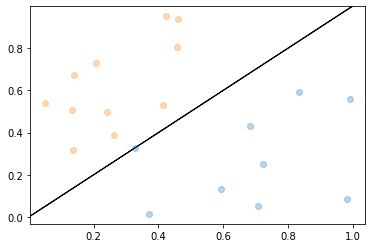

In [5]:
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plotDataset(X,y)
plotVetor(hiperplano)

#Perceptron sem regularização

In [6]:
class CustoPerceptron():
  
  @staticmethod
  def erro(y, ypred):
    return y - ypred

  @staticmethod
  def custo(y, ypred):
    return np.sum(CustoPerceptron.erro(y, ypred)**2)

  @staticmethod
  def gradiente(y, ypred, X):
    return np.matmul(CustoPerceptron.erro(y, ypred), X)

In [7]:
class HingeLoss():
  
  @staticmethod
  def erro(y, ypred):
    return np.multiply(y, ypred)

  @staticmethod
  def custo(y, ypred):
    return np.sum(1 - HingeLoss.erro(y, ypred))

  @staticmethod
  def gradiente(y, ypred, X):
    elementos_marginais = HingeLoss.erro(y, ypred) < 1
    return np.matmul(y[elementos_marginais], X[elementos_marginais])

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):

  def __init__(self, custo=CustoPerceptron()):
    self.w = None
    self.activation = lambda a: (a >= 0)*2-1
    self.alpha = 0.1 #taxa aprendizado
    self.maxIter = 100
    self.custo = custo

  def fit(self, X, y):
    self.w = np.random.uniform(-1, 1, size=2)
    
    for _ in range(self.maxIter):
      if hasattr(self.custo, "preactivated") and self.custo.preactivated:
        ypred = self.preactivate(X)
      else: 
        ypred = self.predict(X) 

      #erro = self.custo.erro(y, ypred)
      #print(erro)

      custo = self.custo.custo(y, ypred)
      #print(custo)

      self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
      #print(self.w)
      
      if custo == 0:
        break
      
  #Incluído por conta da previsão do uso do Adaline (necessita das informações antes de passar pela função ativação)
  def preactivate(self, X):
    return np.matmul(X, self.w)


  def predict(self, X):
    
    #notacao vetorial ao invés de fazer a cada linha do X
    a = self.preactivate(X)
    ypred = self.activation(a)
    
    return ypred

#Treino com 20 pontos - comparativo custo quadrático e Hinge Loss com dataset treino

Acurácia:1.0
[ 1.58441038 -1.51906239]


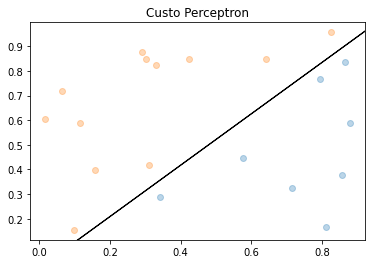

Acurácia:1.0
[ 0.24814819 -0.22690983]


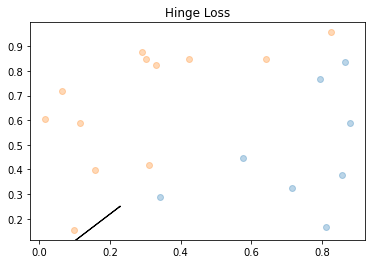

In [9]:
XTreino, yTreino = geraDataset(20)

#fit/predict com o mesmo dataset - Custo quadrático
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(XTreino, yTreino)
ypred = perceptron.predict(XTreino)

print(f"Acurácia:{sum(yTreino == ypred)/len(yTreino)}")
plotDataset(XTreino, yTreino)
print(perceptron.w)
plotVetor(perpendicular(perceptron.w))
plt.title("Custo Perceptron")
plt.show()

#fit/predict com o mesmo dataset - HingeLoss
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(XTreino, yTreino)
ypred = perceptron.predict(XTreino)

print(f"Acurácia:{sum(yTreino == ypred)/len(yTreino)}")
plotDataset(XTreino, yTreino)
print(perceptron.w)
plotVetor(perpendicular(perceptron.w))
plt.title("Hinge Loss")
plt.show()

#Produção de dataset com 1000 pontos e comparativo de acurácia utilizando custo quadrático e Hinge Loss

In [10]:
XTeste, yTeste = geraDataset(1000)

Acurácia:0.966
[ 1.66479631 -1.57420672]


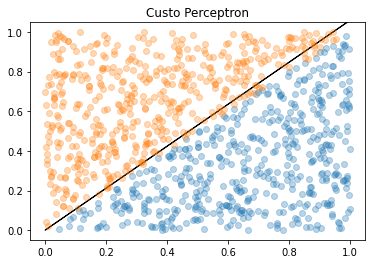

Acurácia:0.986
[ 0.50918026 -0.49570856]


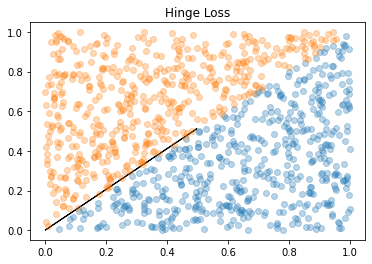

In [11]:
#fit com o mesmo dataset de treino e predict com dataset de 1000 elementos - Custo quadrático
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(XTreino, yTreino)
ypred = perceptron.predict(XTeste)

print(f"Acurácia:{sum(yTeste == ypred)/len(yTeste)}")
plotDataset(XTeste, yTeste)
print(perceptron.w)
plotVetor(perpendicular(perceptron.w))
plt.title("Custo Perceptron")
plt.show()

#fit com o mesmo dataset de treino e predict com dataset de 1000 elementos - Hinge Loss
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(XTreino, yTreino)
ypred = perceptron.predict(XTeste)

print(f"Acurácia:{sum(yTeste == ypred)/len(yTeste)}")
plotDataset(XTeste, yTeste)
print(perceptron.w)
plotVetor(perpendicular(perceptron.w))
plt.title("Hinge Loss")
plt.show()

#Comparativo de N execuções de fit/predict utilizando custo quadrático e Hinge-Loss

Média acurácia custo quadrático: 0.9766775000000001
Média acurácia Hinge-Loss: 0.9774315


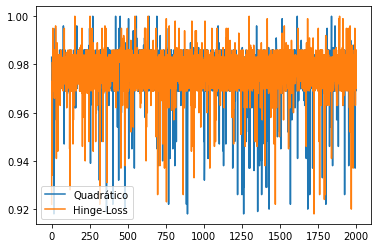

In [31]:
custosQuadratico = []
custosHingeLoss = []
qtdExecucoes = 2000

for i in range(qtdExecucoes):
  #fit com o mesmo dataset de treino e predict com dataset de 1000 elementos - Custo quadrático
  perceptron = Perceptron(custo=CustoPerceptron())
  perceptron.fit(XTreino, yTreino)
  ypred = perceptron.predict(XTeste)

  custoQuatratico = sum(yTeste == ypred)/len(yTeste)
  custosQuadratico.append(custoQuatratico)
  #print(f"Acurácia Custo quadrático:{custoQuatratico}")

  #fit com o mesmo dataset de treino e predict com dataset de 1000 elementos - Hinge-Loss
  perceptron = Perceptron(custo=HingeLoss())
  perceptron.fit(XTreino, yTreino)
  ypred = perceptron.predict(XTeste)

  custoHingeLoss = sum(yTeste == ypred)/len(yTeste)
  custosHingeLoss.append(custoHingeLoss)
  
  #print(f"Acurácia Hinge-Loss:{custoHingeLoss}")
  #print("----")


print(f"Média acurácia custo quadrático: {np.mean(custosQuadratico)}")
print(f"Média acurácia Hinge-Loss: {np.mean(custosHingeLoss)}" )

plt.plot(range(qtdExecucoes), custosQuadratico, label = "Quadrático")
plt.plot(range(qtdExecucoes), custosHingeLoss, label = "Hinge-Loss")
plt.legend()
plt.show()

#Em qual caso você obteve a melhor acurácia, e por quê?

Observei uma acurácia média um pouco maior com o uso do Hinge-Loss na maioria dos lotes de execução feitos. Entendo que isso ocorre por conta das características que o Hinge-Loss possui:

- Ele penaliza amostras classificadas corretamente (as que são fracamente classificadas, as que são fáceis de classificas - que estão longe do hiperplano de separação das classes). E como se existisse um grau de confiabilidade na classificação;

- Isso me leva a entender que, frente ao custo quadrático, ele tem algo como se fosse um grau de confiabilidade na classificação, tendo uma certa penalidade por acertar demais, diminuindo um pouco a possibilidade de overfitting;

- Elementos fáceis de classificar têm baixa influencia no cálculo dos pesos, assim permitindo que se consiga classificar elementos mais difíceis (próximo ao hiperplano de separação, os marginais) corretamente.

- O erro quadrático tem mais dificuldade em classificar amostras difíceis (próximo ao hiperplano de separação), assim os elementos fáceis de classificar têm alta influência no cálculo dos pesos.


#Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?

Entendo que a classificação NÃO será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes utilizando o erro quadrático.

Se for treinado com 20 pontos diferentes utilizando Hinge-Loss e estes forem pontos fáceis de classificar (longe do hiperplano separador) vejo como tendência um resultado de classificação ruim das amostras de teste, uma vez que há grande possibilidade de termos amostras difíceis de classificar (mais próximas e muito próximas do hiperplano separador). 